## 1

Dataset loaded successfully!

Categorical features: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Numerical features: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Data preprocessing complete. The data is now ready for clustering.

Generated 'elbow_method.png'
Generated 'silhouette_score.png'

Applied K-Means clustering with k=3.
Generated 'kmeans_clusters_pca.png' to visualize the clusters.
Generated 'dendrogram.png' for hierarchical clustering.

Clustering analysis script is complete.


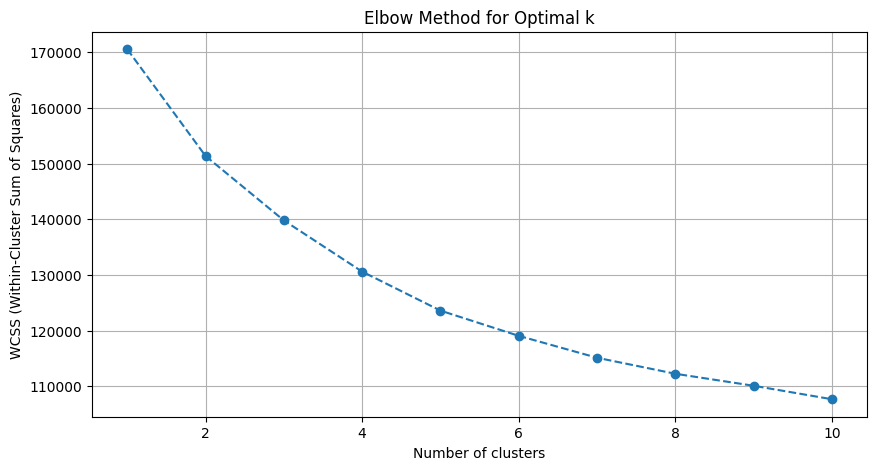

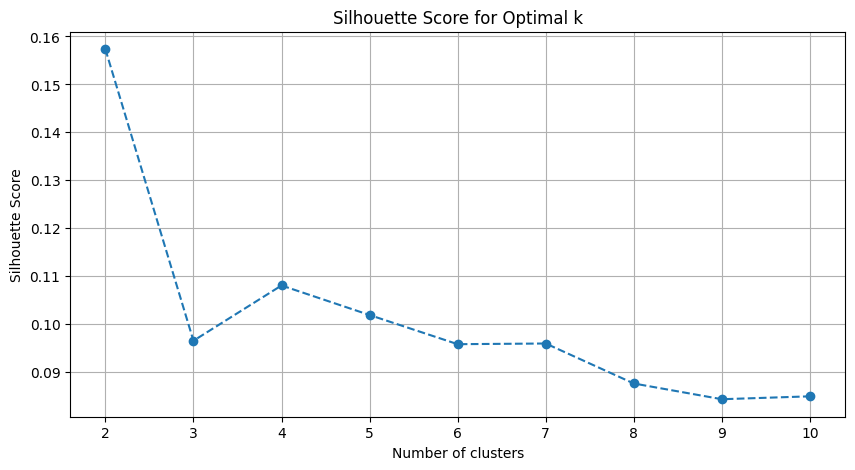

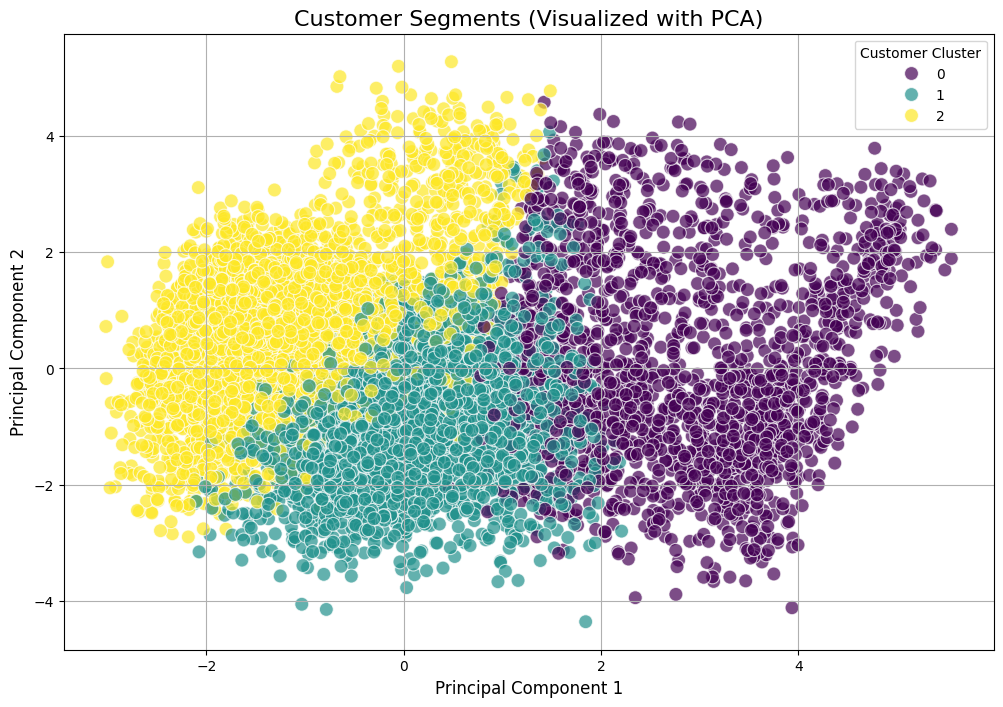

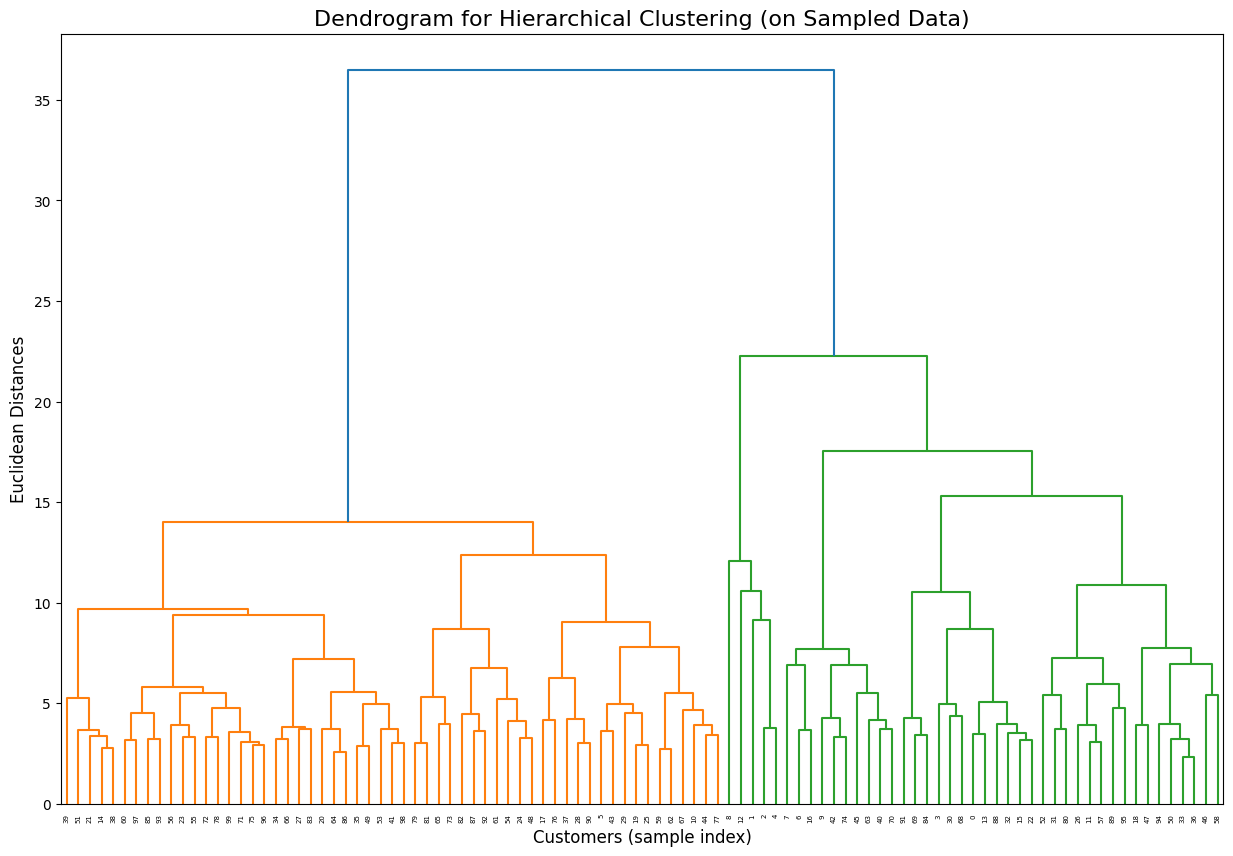

In [2]:
# # Import necessary libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# from sklearn.decomposition import PCA
# import scipy.cluster.hierarchy as sch

# # --- 1. Load the Dataset ---
# # Make sure 'BankChurners.csv' is in the same directory as your script,
# # or provide the full path to the file.
# try:
#     df = pd.read_csv('BankChurners.csv')
#     print("Dataset loaded successfully!")
# except FileNotFoundError:
#     print("Error: 'BankChurners.csv' not found. Please check the file path.")
#     exit()

# # --- 2. Data Preparation and Preprocessing ---

# # Drop the last two columns which are not needed for this analysis
# df_cleaned = df.iloc[:, :-2]

# # Separate the features (X) that will be used for clustering
# # We drop 'Attrition_Flag' and 'CLIENTNUM' as they are not customer behaviors or attributes for clustering
# X = df_cleaned.drop(['Attrition_Flag', 'CLIENTNUM'], axis=1)

# # Identify categorical and numerical features for preprocessing
# categorical_features = X.select_dtypes(include=['object']).columns
# numerical_features = X.select_dtypes(include=np.number).columns

# print(f"\nCategorical features: {list(categorical_features)}")
# print(f"Numerical features: {list(numerical_features)}")

# # Create preprocessing pipelines for numerical and categorical data
# # Numerical features will be scaled to a standard range
# numerical_transformer = StandardScaler()

# # Categorical features will be converted into a numerical format
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# # Create a preprocessor object using ColumnTransformer to apply different transformations to different columns
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# # Apply the preprocessing to the features
# X_processed = preprocessor.fit_transform(X)

# print("\nData preprocessing complete. The data is now ready for clustering.")

# # --- 3. K-Means Clustering ---

# # **Step 3.1: Find the Optimal Number of Clusters (k)**

# # Using the Elbow Method
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
#     kmeans.fit(X_processed)
#     wcss.append(kmeans.inertia_)

# # Plot the Elbow Method graph
# plt.figure(figsize=(10, 5))
# plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
# plt.title('Elbow Method for Optimal k')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
# plt.grid(True)
# plt.savefig('elbow_method.png')
# print("\nGenerated 'elbow_method.png'")

# # Using the Silhouette Score
# silhouette_scores = []
# for i in range(2, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
#     cluster_labels = kmeans.fit_predict(X_processed)
#     silhouette_avg = silhouette_score(X_processed, cluster_labels)
#     silhouette_scores.append(silhouette_avg)

# # Plot the Silhouette Scores
# plt.figure(figsize=(10, 5))
# plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
# plt.title('Silhouette Score for Optimal k')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette Score')
# plt.grid(True)
# plt.savefig('silhouette_score.png')
# print("Generated 'silhouette_score.png'")

# # **Step 3.2: Apply K-Means with the Optimal k**
# # Based on the plots, choose the best k. Let's assume k=3 for this example.
# optimal_k = 3
# kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
# clusters = kmeans.fit_predict(X_processed)

# print(f"\nApplied K-Means clustering with k={optimal_k}.")

# # --- 4. Visualization of Clusters with PCA ---

# # Reduce the dimensionality of the data to 2 components for visualization
# pca = PCA(n_components=2)
# # We need to convert the sparse matrix from the preprocessor to a dense array for PCA
# X_pca = pca.fit_transform(X_processed)

# # Create a scatter plot of the clusters
# plt.figure(figsize=(12, 8))
# sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=100, alpha=0.7)
# plt.title('Customer Segments (Visualized with PCA)', fontsize=16)
# plt.xlabel('Principal Component 1', fontsize=12)
# plt.ylabel('Principal Component 2', fontsize=12)
# plt.legend(title='Customer Cluster')
# plt.grid(True)
# plt.savefig('kmeans_clusters_pca.png')
# print("Generated 'kmeans_clusters_pca.png' to visualize the clusters.")

# # --- 5. Hierarchical Clustering ---

# # A dendrogram for the full dataset would be unreadable and computationally expensive.
# # We will create a dendrogram for a sample of the data.
# sample_size = 100
# X_sample = X_processed[:sample_size]

# plt.figure(figsize=(15, 10))
# dendrogram = sch.dendrogram(sch.linkage(X_sample, method='ward'))
# plt.title('Dendrogram for Hierarchical Clustering (on Sampled Data)', fontsize=16)
# plt.xlabel('Customers (sample index)', fontsize=12)
# plt.ylabel('Euclidean Distances', fontsize=12)
# plt.savefig('dendrogram.png')
# print("Generated 'dendrogram.png' for hierarchical clustering.")

# print("\nClustering analysis script is complete.")

## 2

Dataset loaded successfully!
Data preprocessing complete.
Applied K-Means clustering with k=3.
\n==================================================
ENHANCEMENT 1: CLUSTER PROFILING
==================================================\n
\n--- Cluster Profiles (Numerical Averages) ---\n
Cluster                              0            1            2
Customer_Age                 46.160647    46.669911    46.114804
Dependent_count               2.512129     2.303325     2.313580
Months_on_book               35.794609    36.377129    35.619724
Total_Relationship_Count      3.378437     3.958097     3.870982
Months_Inactive_12_mon        2.292722     2.432549     2.286901
Contacts_Count_12_mon         2.394609     2.632063     2.336978
Credit_Limit              24851.457682  6328.465883  3915.885808
Total_Revolving_Bal        1255.194609   470.624763  1685.237481
Avg_Open_To_Buy           23596.263073  5857.841119  2230.648327
Total_Amt_Chng_Q4_Q1          0.771586     0.716908     0.790025
T

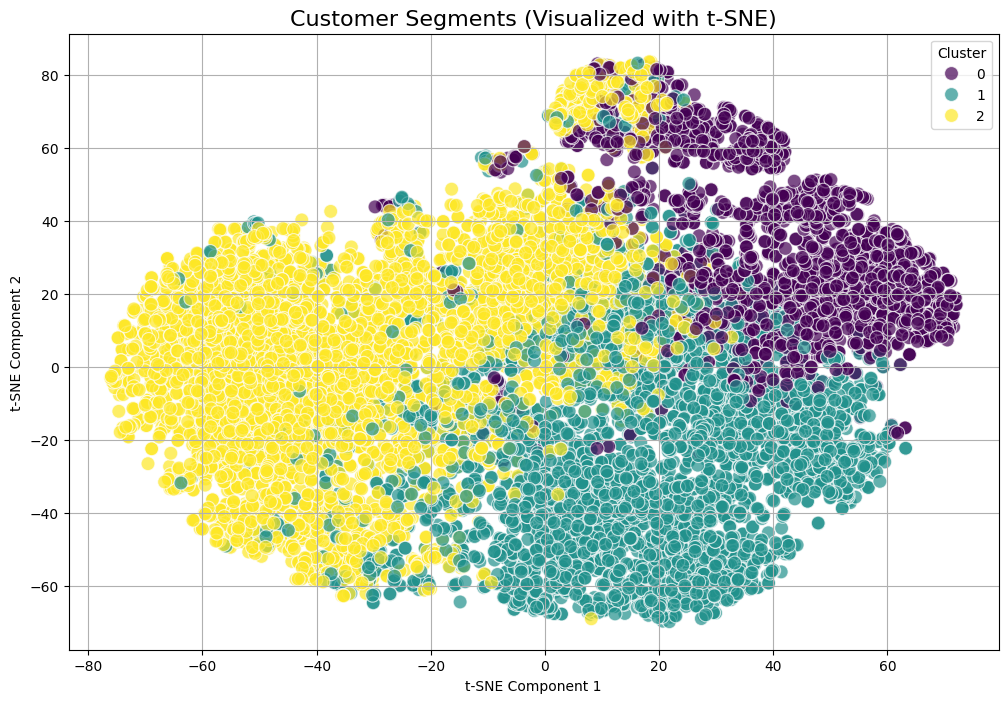

In [5]:
# # Import necessary libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.cluster import KMeans, DBSCAN
# from sklearn.metrics import silhouette_score
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE # Added for t-SNE

# # --- 1. Load the Dataset ---
# try:
#     df = pd.read_csv('BankChurners.csv')
#     print("Dataset loaded successfully!")
# except FileNotFoundError:
#     print("Error: 'BankChurners.csv' not found. Please check the file path.")
#     exit()

# # --- 2. Data Preparation and Preprocessing ---
# df_cleaned = df.iloc[:, :-2]
# X = df_cleaned.drop(['Attrition_Flag', 'CLIENTNUM'], axis=1)

# categorical_features = X.select_dtypes(include=['object']).columns
# numerical_features = X.select_dtypes(include=np.number).columns

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ])
# X_processed = preprocessor.fit_transform(X)
# print("Data preprocessing complete.")

# # --- 3. K-Means Clustering ---
# optimal_k = 3 # You can set this based on elbow/silhouette plots
# kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
# clusters_kmeans = kmeans.fit_predict(X_processed)
# print(f"Applied K-Means clustering with k={optimal_k}.")


# # --- 4. ENHANCEMENT 1: Cluster Profiling ---
# print("\\n" + "="*50)
# print("ENHANCEMENT 1: CLUSTER PROFILING")
# print("="*50 + "\\n")
# df_cleaned['Cluster'] = clusters_kmeans

# # Numerical summary
# numerical_summary = df_cleaned.groupby('Cluster')[numerical_features].mean()
# print("\\n--- Cluster Profiles (Numerical Averages) ---\\n")
# print(numerical_summary.T) # Transposed for better readability

# # Categorical summary
# print("\\n--- Cluster Profiles (Categorical Modes) ---\\n")
# for feature in categorical_features:
#     mode_summary = df_cleaned.groupby('Cluster')[feature].apply(lambda x: x.mode()[0])
#     print(f"\\n--- {feature} ---")
#     print(mode_summary)
# print("\\n" + "="*50 + "\\n")


# # --- 5. ENHANCEMENT 2: Advanced Visualization with t-SNE ---
# print("ENHANCEMENT 2: Applying t-SNE for Visualization...")
# tsne = TSNE(n_components=2, perplexity=30, random_state=42)
# X_tsne = tsne.fit_transform(X_processed)

# plt.figure(figsize=(12, 8))
# sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters_kmeans, palette='viridis', s=100, alpha=0.7)
# plt.title('Customer Segments (Visualized with t-SNE)', fontsize=16)
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.legend(title='Cluster')
# plt.grid(True)
# plt.savefig('kmeans_clusters_tsne.png')
# print("Generated 'kmeans_clusters_tsne.png' for advanced visualization.")

In [6]:
# # --- 6. ENHANCEMENT 3: (Optional) Try the DBSCAN Algorithm ---
# # To run this, you can comment out the K-Means section and uncomment this block.
# print("\\nENHANCEMENT 3: Applying DBSCAN...")
# # NOTE: DBSCAN is sensitive to the 'eps' parameter. It requires tuning.
# dbscan = DBSCAN(eps=2.5, min_samples=10)
# clusters_dbscan = dbscan.fit_predict(X_processed)

# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
# n_noise_ = list(clusters_dbscan).count(-1)
# print(f'Estimated number of clusters: {n_clusters_}')
# print(f'Estimated number of noise points: {n_noise_}')

\nENHANCEMENT 3: Applying DBSCAN...
Estimated number of clusters: 7
Estimated number of noise points: 4739


## 3

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- Data Preprocessing (Re-using previous steps) ---
df = pd.read_csv("BankChurners.csv")
columns_to_drop = ['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df = df.drop(columns=columns_to_drop)

# Target Variable Encoding (Not strictly needed for clustering, but kept for consistency)
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Attrition_Flag' in numerical_cols:
    numerical_cols.remove('Attrition_Flag')

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
X = df_encoded.drop('Attrition_Flag', axis=1)

# Standard Scaling
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# --- 1. K-Means Clustering: Finding Optimal K (Elbow Method) ---
inertia = []
K_range = range(1, 11)

# Compute inertia for K=1 to K=10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.grid(True)
plt.savefig('elbow_method.png')
plt.close()

# --- 2. Dimensionality Reduction (PCA) for Visualization ---
# Reduce the features to 2 principal components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
X['PCA1'] = X_pca[:, 0]
X['PCA2'] = X_pca[:, 1]

# --- 3. K-Means Clustering (Using K=3, inferred from the expected elbow bend) ---
# We will use K=3 for visualization based on common elbow patterns for this size of data
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
X['KMeans_Cluster'] = kmeans_final.fit_predict(X.drop(columns=['PCA1', 'PCA2']))

# --- 4. Visualization ---
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X['PCA1'], X['PCA2'], c=X['KMeans_Cluster'], cmap='viridis', s=50, alpha=0.7)

# Plot cluster centroids (transformed to PCA space)
centroids_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', label='Centroids')

plt.title(f'K-Means Clusters visualized with PCA ($K={optimal_k}$)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.savefig('kmeans_pca_clusters.png')
plt.close()

print(f"K-Means clustering with K={optimal_k} performed and visualized using PCA.")
print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]:.4f}")
print("Image 'elbow_method.png' and 'kmeans_pca_clusters.png' have been generated.")

# --- 5. DBSCAN Clustering (An advanced method demonstration) ---
# DBSCAN requires careful parameter tuning (eps and min_samples).
# We'll use reasonable default-ish values to demonstrate the technique.
# Clustering is performed on the high-dimensional data (X).
dbscan = DBSCAN(eps=3, min_samples=10)
X['DBSCAN_Cluster'] = dbscan.fit_predict(X.drop(columns=['PCA1', 'PCA2', 'KMeans_Cluster']))

# --- 6. DBSCAN Visualization ---
# Cluster label of -1 is noise (outliers) in DBSCAN
plt.figure(figsize=(10, 7))
scatter_dbscan = plt.scatter(X['PCA1'], X['PCA2'], c=X['DBSCAN_Cluster'], cmap='Paired', s=50, alpha=0.7)
plt.title('DBSCAN Clusters visualized with PCA')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')

# Manually create legend elements for DBSCAN, distinguishing noise (-1)
unique_labels = np.unique(X['DBSCAN_Cluster'])
legend_handles = []
for label in unique_labels:
    color = scatter_dbscan.cmap(scatter_dbscan.norm(label))
    if label == -1:
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label='Noise (-1)', markerfacecolor='gray', markersize=10))
    else:
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {label}', markerfacecolor=color, markersize=10))

plt.legend(handles=legend_handles, title='Cluster')
plt.savefig('dbscan_pca_clusters.png')
plt.close()

print("Image 'dbscan_pca_clusters.png' has been generated for the DBSCAN results.")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


K-Means clustering with K=3 performed and visualized using PCA.
Variance explained by PC1: 0.1633
Variance explained by PC2: 0.1263
Image 'elbow_method.png' and 'kmeans_pca_clusters.png' have been generated.
Image 'dbscan_pca_clusters.png' has been generated for the DBSCAN results.


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# --- 1. Data Preparation (Same as previous steps to ensure consistency) ---
df = pd.read_csv("BankChurners.csv")

# Drop unnecessary columns and the target variable (unsupervised analysis)
columns_to_drop = ['CLIENTNUM', 'Attrition_Flag',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
X = df.drop(columns=columns_to_drop)

# Identify Categorical and Numerical Columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-Hot Encoding for categorical features
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# --- 2. Scaling and K-Means Clustering ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

# K-Means with K=4 (based on the previous Elbow Method analysis)
K_OPTIMAL = 4
kmeans_final = KMeans(n_clusters=K_OPTIMAL, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters_kmeans = kmeans_final.fit_predict(X_scaled_df)

# --- 3. Persona Creation: Merge Labels and Summarize ---

# Add the cluster labels to the original, unscaled, encoded DataFrame
X_personas = X_encoded.copy()
X_personas['Cluster'] = clusters_kmeans

# Define features for summarization
# We will use median for numerical features to be robust against outliers
# We will use mean for the one-hot encoded columns (which represents the proportion of that category in the cluster)
numerical_features = [col for col in X_personas.columns if col not in X_encoded.columns or not col.startswith(('Gender_', 'Education_Level_', 'Marital_Status_', 'Income_Category_', 'Card_Category_'))]
binary_categorical_features = [col for col in X_personas.columns if col.startswith(('Gender_', 'Education_Level_', 'Marital_Status_', 'Income_Category_', 'Card_Category_'))]

# Calculate median for numerical features and mean for binary categories
cluster_summary_num = X_personas.groupby('Cluster')[numerical_features].median()
cluster_summary_binary = X_personas.groupby('Cluster')[binary_categorical_features].mean()

# Combine the summaries
cluster_summary = pd.concat([cluster_summary_num, cluster_summary_binary], axis=1)

# Transpose for better readability (Clusters as columns)
cluster_summary_t = cluster_summary.T

# Simplify the presentation by rounding values
cluster_summary_t = cluster_summary_t.round(2)

# Save the cluster summary for display
cluster_summary_t.to_csv("cluster_personas_summary.csv")

print("Cluster persona summary calculated.")
print("\n--- Raw Cluster Summary Table (Median/Mean) ---")
print(cluster_summary_t.to_markdown(numalign="left", stralign="left"))

Cluster persona summary calculated.

--- Raw Cluster Summary Table (Median/Mean) ---
|                                | 0      | 1     | 2    | 3    |
|:-------------------------------|:-------|:------|:-----|:-----|
| Customer_Age                   | 46     | 46    | 47   | 46   |
| Dependent_count                | 2      | 3     | 2    | 2    |
| Months_on_book                 | 36     | 36    | 36   | 36   |
| Total_Relationship_Count       | 4      | 3     | 4    | 4    |
| Months_Inactive_12_mon         | 2      | 2     | 2    | 2    |
| Contacts_Count_12_mon          | 2      | 2     | 3    | 2    |
| Credit_Limit                   | 2723   | 30172 | 7464 | 4045 |
| Total_Revolving_Bal            | 1247   | 1309  | 1301 | 1277 |
| Avg_Open_To_Buy                | 1438.3 | 28930 | 6259 | 2926 |
| Total_Amt_Chng_Q4_Q1           | 0.73   | 0.75  | 0.73 | 0.74 |
| Total_Trans_Amt                | 4068.5 | 4411  | 3170 | 4011 |
| Total_Trans_Ct                 | 69     | 74    | 60   

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# --- 1. Data Preparation (Unscaled for Interpretation) ---

# Load Data
df = pd.read_csv("BankChurners.csv")

# Drop unnecessary columns and the target variable (unsupervised)
columns_to_drop = ['CLIENTNUM', 'Attrition_Flag',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
X = df.drop(columns=columns_to_drop)

# Identify Categorical and Numerical Columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-Hot Encoding for clustering
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


# --- 2. Scaling (Required for K-Means) ---

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)


# --- 3. K-Means Clustering (K=4) ---

K_OPTIMAL = 4 # Based on previous Elbow Method analysis
kmeans_final = KMeans(n_clusters=K_OPTIMAL, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters_kmeans = kmeans_final.fit_predict(X_scaled_df)


# --- 4. Persona Creation (Merging and Aggregation) ---

# Create a DataFrame of the original, unscaled, encoded data with cluster labels
X_personas = X_encoded.copy()
X_personas['Cluster'] = clusters_kmeans

# Calculate descriptive statistics for each cluster

# A. Numerical Features: Use Median for robustness against skew/outliers
numerical_profile = X_personas.groupby('Cluster')[numerical_cols].median().reset_index()

# B. Categorical Features (One-Hot Encoded): Calculate the Mean (which is the proportion of 1s)
# Then find the column with the highest mean (most frequent category) for the original feature
categorical_profile = X_personas.groupby('Cluster')[X_encoded.columns.drop(numerical_cols)].mean()

# Function to extract the dominant category label from the one-hot columns
def get_dominant_category(row, prefix):
    # Filter columns that start with the prefix
    cols = [col for col in row.index if col.startswith(prefix)]
    if not cols:
        return 'N/A'

    # Find the column with the maximum value (highest proportion)
    max_col = row[cols].idxmax()

    # Extract the category name after the prefix (e.g., 'Education_Level_Graduate' -> 'Graduate')
    return max_col.split('_')[-1] if max_col else 'N/A'

# Map the dominant categories back to their original feature names
profile_df = pd.DataFrame({'Cluster': range(K_OPTIMAL)})
profile_df = profile_df.merge(numerical_profile, on='Cluster')

# List of original categorical features (excluding the one dropped by drop_first=True)
original_categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for feature in original_categorical_features:
    # Use the original feature name as the prefix (e.g., 'Gender_F', 'Gender_M')
    prefix = feature + '_'
    profile_df[feature] = categorical_profile.apply(lambda row: get_dominant_category(row, prefix), axis=1)

# --- 5. Final Output Cleanup ---

# Rename columns for clarity and select key features
final_profile = profile_df[['Cluster', 'Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio', 'Gender', 'Income_Category', 'Card_Category']]

# Round numerical values for presentation
for col in ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']:
    if col in final_profile.columns:
        final_profile[col] = final_profile[col].round(2)

print("\n--- Cluster Persona Profiles (Median Values) ---")
print(final_profile.to_markdown(index=False))


--- Cluster Persona Profiles (Median Values) ---
|   Cluster |   Customer_Age |   Credit_Limit |   Total_Trans_Amt |   Avg_Utilization_Ratio | Gender   | Income_Category   | Card_Category   |
|----------:|---------------:|---------------:|------------------:|------------------------:|:---------|:------------------|:----------------|
|         0 |             46 |           2723 |            4068.5 |                    0.41 | M        | Less than $40K    | Silver          |
|         1 |             46 |          30172 |            4411   |                    0.04 | M        | $80K - $120K      | Silver          |
|         2 |             47 |           7464 |            3170   |                    0.14 | M        | $60K - $80K       | Gold            |
|         3 |             46 |           4045 |            4011   |                    0.23 | M        | $40K - $60K       | Silver          |


/tmp/ipython-input-2756327199.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_profile[col] = final_profile[col].round(2)
